# Feature Extraction and Engineering


**Lesson Goals**

In this lesson you are going to learn:

    What feature selection is.
    Why you need to select features.
    How to select features.

**Introduction**

From the Machine Learning perspective, a dataset represents a set of observations. Every observation in the dataset is represented by a row. Each row contains a number of columns or features. For example, in an application of financial credit assignment, every consumer applying for a loan is an observation in our dataset, and each observation is described by features such as age, marital status, amount of dependent persons, employment status, yearly income, etc. We would then generate a classification algorithm that would return a decision on whether we should approve a loan for each customer.
Feature Selection

In Machine Learning, feature engineering is the task of deciding how to represent an observation. There may be many features available, but all of them may not be necessarily useful. For instance, in our example credit application, the favorite refrigerator color of the consumer would not be relevant, and thus we would not include it in our list of features.

In this lesson we will use the Kaggle Census dataset to demonstrate the data transformations.

First, we will load the dataset using Pandas and look at the first five rows using the head function. 

In [1]:
import numpy as np 
import pandas as pd

In [2]:
census = pd.read_csv('../census.csv') 
census.head() 

,CensusId,State,County,TotalPop,Men,Women,Hispanic,White,Black,Native,...,Walk,OtherTransp,WorkAtHome,MeanCommute,Employed,PrivateWork,PublicWork,SelfEmployed,FamilyWork,Unemployment
0,1001,Alabama,Autauga,55221,26745,28476,2.6,75.8,18.5,0.4,...,0.5,1.3,1.8,26.5,23986,73.6,20.9,5.5,0.0,7.6
1,1003,Alabama,Baldwin,195121,95314,99807,4.5,83.1,9.5,0.6,...,1.0,1.4,3.9,26.4,85953,81.5,12.3,5.8,0.4,7.5
2,1005,Alabama,Barbour,26932,14497,12435,4.6,46.2,46.7,0.2,...,1.8,1.5,1.6,24.1,8597,71.8,20.8,7.3,0.1,17.6
3,1007,Alabama,Bibb,22604,12073,10531,2.2,74.5,21.4,0.4,...,0.6,1.5,0.7,28.8,8294,76.8,16.1,6.7,0.4,8.3
4,1009,Alabama,Blount,57710,28512,29198,8.6,87.9,1.5,0.3,...,0.9,0.4,2.3,34.9,22189,82.0,13.5,4.2,0.4,7.7


# Data Types

Another issue that we will have to decide is the type of the attributes, it may be continuous, discrete, numeric, or categorical, and this decision may have further repercussions down the road.


**Discrete Variables**

A discrete variable is a variable that can only take on integer values. This type of variable is useful to describe features like age in years or number of children.


**Continuous Variables**

A continuous variable can take on any number within its defined range. Examples of continuous variables are an exact weight measurement of an object or a measurement of an exact distance between two points.


**Categorical Variables**

A categorical variable is a variable that can have a finite number of values within its defined range. Typically a categorical variable will have two or more values. The values may or may not be ordinal. An example of a ordinal categorical variable is a variable that describes the risk level of customers of an insurance company (for example, low, medium and high). An example of a non ordinal variable can be blood type or eye color. Either of these variables do not have an inherent ordering to them.

Looking at the census dataset, we can see that TotalPop is a discrete variable since it is of type int64. PrivateWork and PublicWork are continuous variables as they are of type float64. State and County are categorical variables. 

In [3]:
census.dtypes

CensusId             int64
State               object
County              object
TotalPop             int64
Men                  int64
Women                int64
Hispanic           float64
White              float64
Black              float64
Native             float64
Asian              float64
Pacific            float64
Citizen              int64
Income             float64
IncomeErr          float64
IncomePerCap         int64
IncomePerCapErr      int64
Poverty            float64
ChildPoverty       float64
Professional       float64
Service            float64
Office             float64
Construction       float64
Production         float64
Drive              float64
Carpool            float64
Transit            float64
Walk               float64
OtherTransp        float64
WorkAtHome         float64
MeanCommute        float64
Employed             int64
PrivateWork        float64
PublicWork         float64
SelfEmployed       float64
FamilyWork         float64
Unemployment       float64
d

# Transforming a Variable and Changing its Type

There are cases where we may opt to transform a variable to change its type. Typically we take a discrete or continuous variable and transform it into a categorical variable by dividing the range into bins. For example, we might take a variable describing income and divide it into 3 bins - low income, medium income, and high income. Doing this comes with a cost of information loss. We simplify the variable but we have now lost information about each person's income.

In the census dataset, we can convert the Income variable from continuous to categorical. Pandas offers us two functions to perform this task called cut and qcut. First we can look at the distribution of income using a histogram. This will give us a better idea of how many bins we want to have and how much of the data each bin should contain.



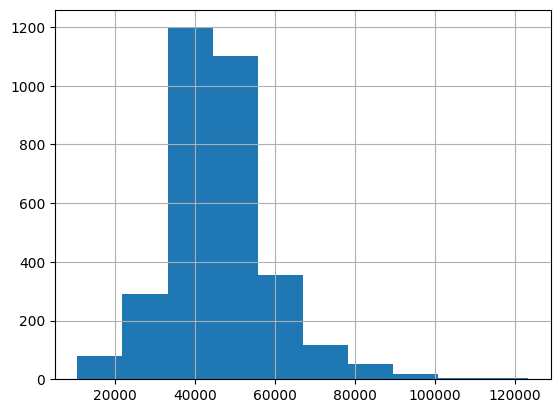

In [4]:
census.Income.hist();

We can see that the bulk of the data falls between approximately $30,000 and $70,000. If we created bins by dividing the range evenly into 3 bins, it would mean that there would be more people in the middle bin. Let's explore creating bins both based on the range of the data as well as based on the distribution of the data (in other words, based on percentiles of the population).

We can pass to the cut function the number of bins and thus create bins using the range of the variable. 

In [5]:
census['IncomeRange'] = pd.cut(census.Income, 3) 
census.IncomeRange.value_counts() 

IncomeRange
(10386.046, 48150.333]    1984
(48150.333, 85801.667]    1194
(85801.667, 123453.0]       41
Name: count, dtype: int64

We can also opt to create bins based on the distribution. In this case, we will look at the min, 33rd percentile, 66th percentile and the max. We can pass these percentiles to the qcut function



In [6]:
census['IncomePercentile'] = pd.qcut(census.Income, [0, 0.3333, 0.6666, 1]) 
census.IncomePercentile.value_counts()



IncomePercentile
(10498.999, 40630.0]     1074
(49736.832, 123453.0]    1073
(40630.0, 49736.832]     1072
Name: count, dtype: int64

# Variable Selection

We have mentioned in previous lessons that machine learning seeks to balance predictive power and information loss. Creating more complex models can be computationally expensive. Therefore, it is our goal to create a simple model while sacrificing as little information as possible.


**Correlated Features**

A simple and important way to reduce variables is by removing correlated features. In performing feature selection, we want to avoid highly correlated features and dependent features. The reason is that adding one new highly correlated or dependent feature to the instance representation does not provide new information the Machine Learning can leverage, and it has the disadvantage of unnecessarily complicating the learning process and the resulting model. In our example, if we already have a yearly income feature, it may be redundant to include a fixed monthly income feature.

In the census data, we would also like to avoid correlated features. One way to detect correlation between features is by computing the pairwise correlation of all numeric variables in the dataset.



In [8]:
census.corr() 

ValueError: could not convert string to float: 'Alabama'

We can see that Men and Women have a correlation of 0.999527. Therefore, we should drop one of the two to avoid redundant information.


**Forward Greedy Feature Selection**

Forward greedy feature selection is an algorithm that starts off with a single feature and keeps adding features to the model while there is still a significant improvement in a performance metric. We stop adding features once we no longer see a significant improvement. Our algorithm for forward feature selection can be described as the following:

For every remaining feature f:

    m is the model resulting from adding f to the best estimator with q features.
    Test m.
    Update b which is the best feature to add so far.

The best performing q+1 features are the original q features plus feature b.

This algorithm is a greedy algorithm. This means that we only make the optimal decision at each stage. We cannot go back and replace variables that we have already added. We can only move forward and add more variables or decide to stop.


**Backward Elimination**

This algorithm is also greedy and has the opposite strategy of forward selection. We start with all features and eliminate features one by one. Each time we select the variable for removal that has the least impact on model performance. Typically, we stop at a predetermined number of features.


**Derived Features**

A derived feature is a new feature that you create by combining two or more preexisting raw features. In our census example, we can create a derived feature for detecting counties that have a low median household income and unemployment higher than 7 percent.




In [10]:
census['HighUnemploymentLowIncome'] = np.where((census.Unemployment > 0.07) & (census.IncomePercentile.cat.codes == 0), 1, 0) 
census.HighUnemploymentLowIncome.value_counts()

HighUnemploymentLowIncome
0    2147
1    1073
Name: count, dtype: int64


Note that we converted the categorical column into coded data to allow easy comparison and then selected the lowest income group (where the code equals zero).

How do we know whether Machine Learning will improve with our new derived feature? As mentioned previously on this chapter, Machine Learning is an experimental science, so you make the experiment of adding the new derived feature and compare the resulting quality metric with that of the original model.


**Wrappers**

A wrapper is a program that performs feature selection and provides the resulting feature set to the Machine Learning workflow. In our example credit application, if every applicant is described by a set of 20 features, but we suspect that not all of them are independent and informative, we may use a backward elimination wrapper, that will find the smallest best performing subset of features, let's assume that it has only 8 features, then the Machine Learning workflow would proceed from the sampling phase considering for the rest of the workflow only those 8 features.